# SF2935 Project

This is a low-data event, namely we are gven 500 training samples. The dataset comprises of songs, and each row is sample song, which is represented by a an 11-D Vector which account for 11 features - !!!TODO Write them here

In [1]:
import numpy as np 

import matplotlib.pyplot as plt

import scipy.linalg as la

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn


seed = 42

## TODO

- __Pre-processing__
    - [ ] Relevance determination of features
    - [ ] Visualize dataset
    - [ ] Split into training and test sets
    
- __Models__
    - [ ] Logistic regression
    - [ ] Discriminant analysis (LDA, QDA)
    - [ ] k-Nearest neighbours
    - [ ] Support vector machines
    - [ ] Tree based methods 
    - [ ] Neural networks

- __Model validation and tuning__
    - [ ] k-Cross validation
    - [ ] Confusion matrix analysis
    - [ ] Bayesian optimization of hyper-parameters
    - [ ] Relevance determination

- __Extras__
    - [ ] Used GAN to generate data to improve neural network classification

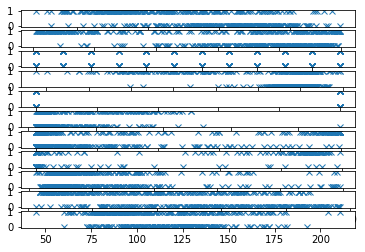

In [2]:
dataset  = np.genfromtxt('project_train.csv', delimiter=',')
dataset  = dataset[~np.isnan(dataset).any(axis=1)]

features = ['danceability', 'energy','key','loudness','mode','speechniess','acousticness','instrumentalness','liveness','valence','tempo']

# x,y of whole dataset
x = dataset[:,0:-1]
y = dataset[:,-1]


loudness_outlier1_ind = np.argmax(x[:,3]) # feature number 4 in list
x = np.delete(x, loudness_outlier1_ind, 0)
y = np.delete(y, loudness_outlier1_ind, 0)

loudness_outlier2_ind = np.argmin(x[:,3]) # feature number 4 in list
x = np.delete(x, loudness_outlier2_ind, 0)
y = np.delete(y, loudness_outlier2_ind, 0)

energy_outlier_ind    = np.argmax(x[:,1]) # feature number 2 in list
x = np.delete(x, energy_outlier_ind, 0)
y = np.delete(y, energy_outlier_ind, 0)





test_set_final = np.genfromtxt('project_test.csv', delimiter=',')
test_set_final  = test_set_final[~np.isnan(test_set_final).any(axis=1)]
x_all_tree = np.delete(x, 2, axis=1)
test_set_final = np.delete(test_set_final, 2, axis=1)



fig, axs = plt.subplots(len(features))
for i in range(len(features)):
    axs[i].plot(x[:,i],y,'x')
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi']     = 100 

#No. datapoints from each class.
nClass0 = sum(y==0)
nClass1 = sum(y==1)

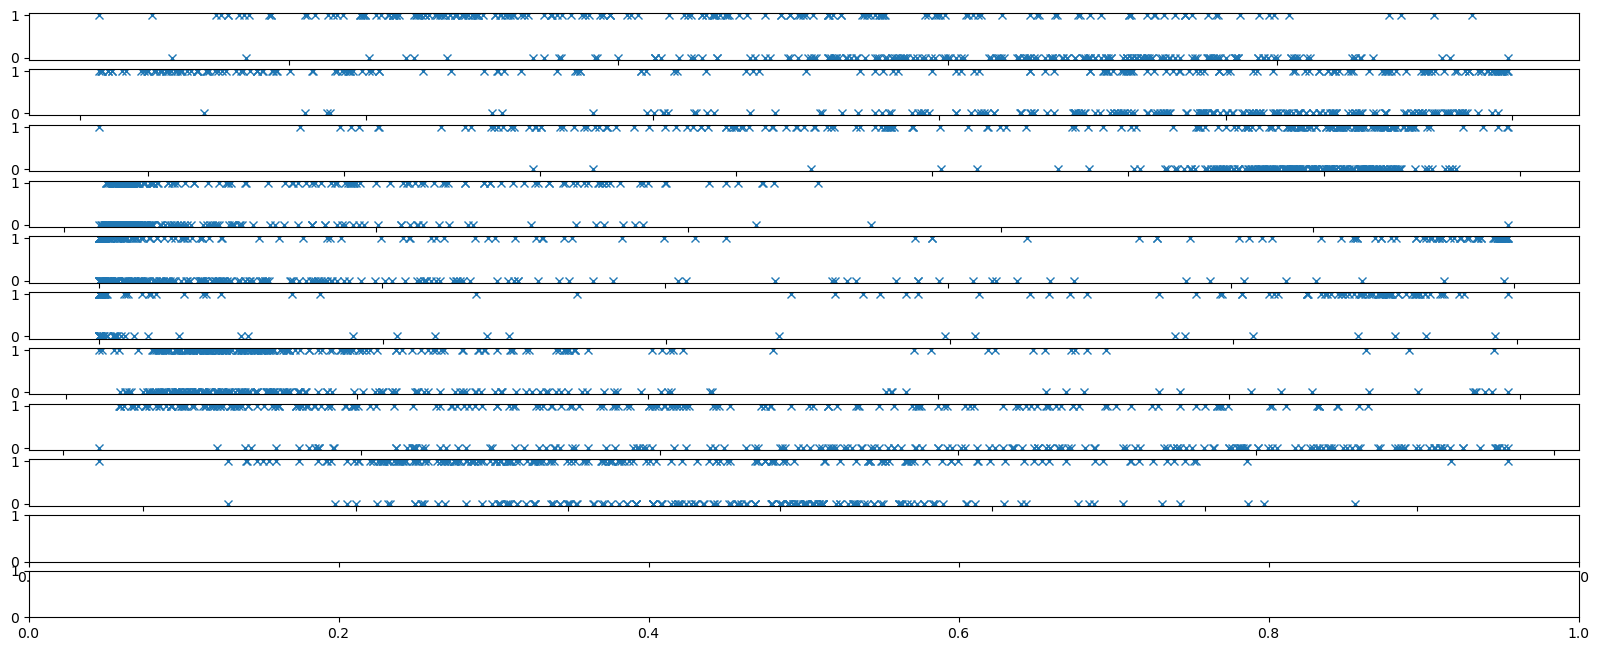

In [3]:
# Scaling the input features, then splitting into training and testing dataset
scaler   = StandardScaler()
scaler.fit(x)
dataset  = scaler.transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed)

x_train_cont = np.delete(x_train, (2,4), axis=1)

x_test_cont = np.delete(x_test, (2,4), axis=1)

x_train_tree = np.delete(x_train, 2, axis=1)
x_test_tree  = np.delete(x_test, 2, axis=1)

fig, axs = plt.subplots(len(features))
for i in range(len(features)-2):
    axs[i].plot(x_train_cont[:,i],y_train,'x')
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi']     = 100 

## Logistic regression

In [4]:
# Todo, tuning, regularization, plot coefficients £

logistic_regression= LogisticRegression(max_iter=500)
logistic_regression.fit(x_train,y_train)
y_pred=logistic_regression.predict(x_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.75


In [5]:
# Todo, tuning, regularization, plot coefficients £

logistic_regression= LogisticRegression(max_iter=500)
logistic_regression.fit(x_train_cont,y_train)
y_pred=logistic_regression.predict(x_test_cont)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7395833333333334


## Linear Discriminant Analysis (Anton)

In [6]:
#Assumes that the proportion of probabilites is 0.5.

lda = LinearDiscriminantAnalysis() #Creates LDA instance.
lda.fit(x_train,y_train) #Training
lda_predictions = lda.predict(x_test) #The predictions for the test set.
print('Accuracy of LDA is: ',metrics.accuracy_score(y_test,lda_predictions))

Accuracy of LDA is:  0.7708333333333334


In [7]:
#Assumes that the proportion of probabilites is 0.5.

lda = LinearDiscriminantAnalysis() #Creates LDA instance.
lda.fit(x_train_cont,y_train) #Training
lda_predictions = lda.predict(x_test_cont) #The predictions for the test set.
print('Accuracy of LDA is: ',metrics.accuracy_score(y_test,lda_predictions))

Accuracy of LDA is:  0.7708333333333334


## Quadratic Discriminant Analysis (Nazaal)

In [8]:
#Assumes that the proportion of probabilites is 0.5.

qda = QuadraticDiscriminantAnalysis() #Creates QDA instance.
qda.fit(x_train,y_train) #Training.
qda_predictions = qda.predict(x_test) #The predictions for the test set.
print('Accuracy of QDA is: ',metrics.accuracy_score(y_test,qda_predictions))

Accuracy of QDA is:  0.84375


In [9]:
#Assumes that the proportion of probabilites is 0.5.

qda = QuadraticDiscriminantAnalysis() #Creates QDA instance.
qda.fit(x_train_cont,y_train) #Training.
qda_predictions = qda.predict(x_test_cont) #The predictions for the test set.
print('Accuracy of QDA is: ',metrics.accuracy_score(y_test,qda_predictions))

Accuracy of QDA is:  0.8333333333333334


## k-Nearest neighbours (Viktor)

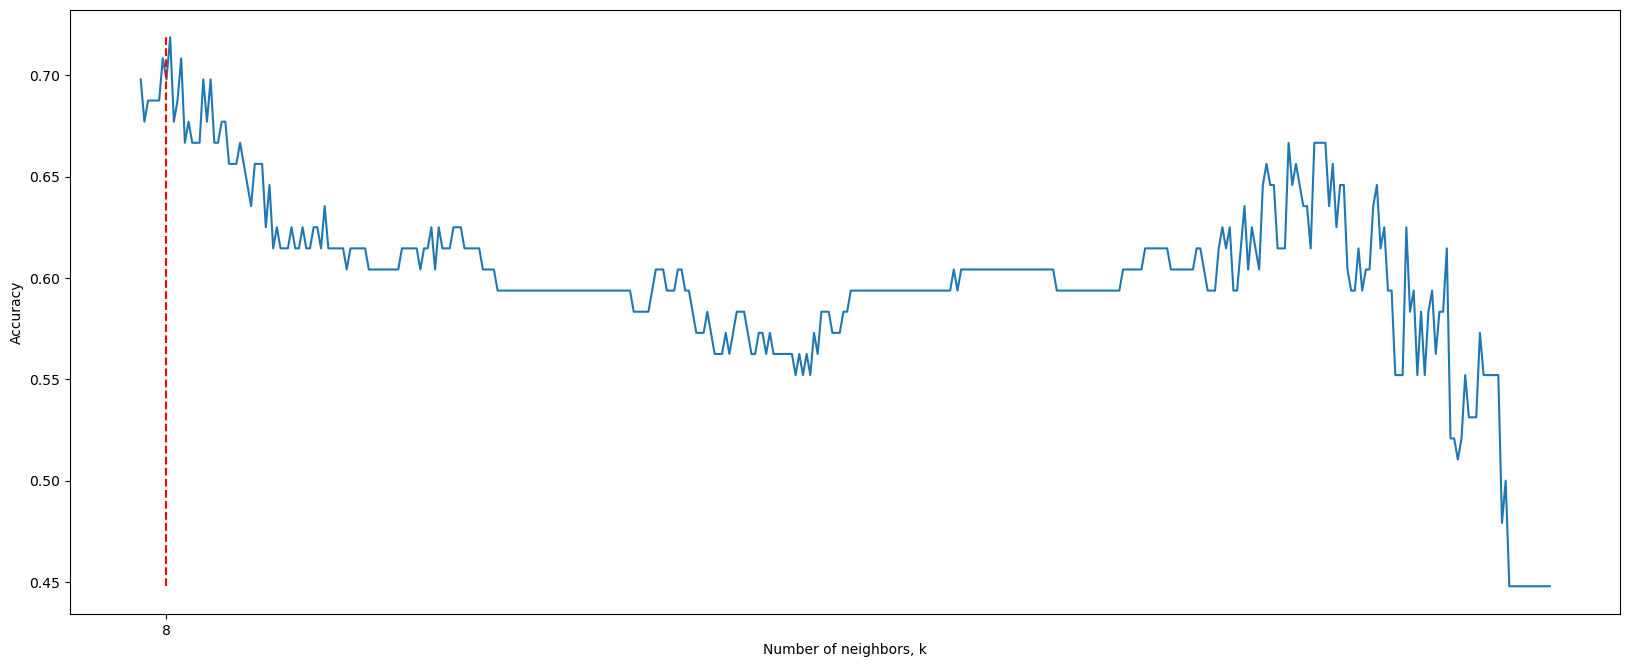

In [10]:
acc_list = []
for k in range(1,len(x_train)+1):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train, y_train)
    y_pred = neigh.predict(x_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
max_acc = max(acc_list)
opt_k = acc_list.index(max_acc)
plt.plot(range(1,len(x_train)+1),acc_list,[opt_k,opt_k],[min(acc_list),max_acc],'r--')
plt.xlabel('Number of neighbors, k')
plt.ylabel('Accuracy')
locs, labels = plt.xticks()
plt.xticks([opt_k])
plt.show()

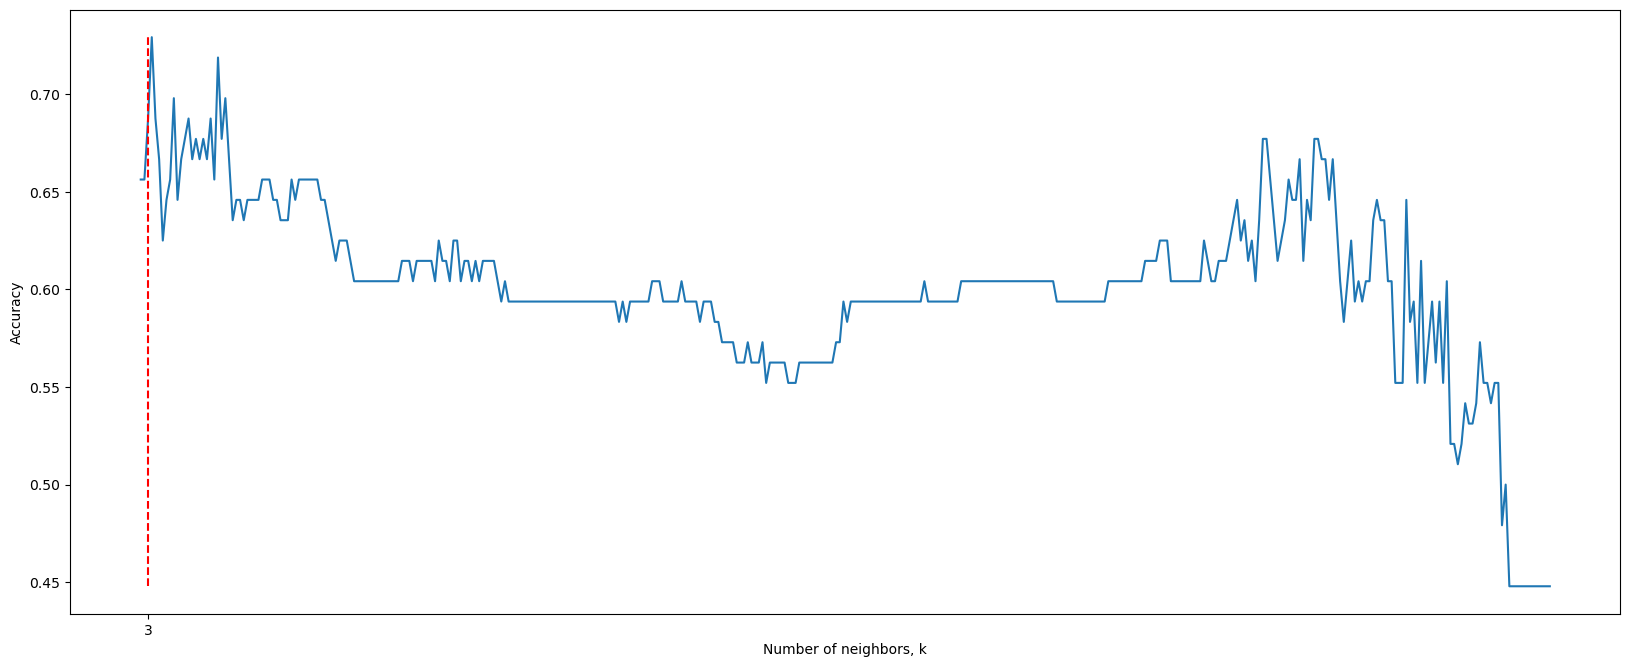

In [11]:
acc_list = []
for k in range(1,len(x_train)+1):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train_cont, y_train)
    y_pred = neigh.predict(x_test_cont)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
max_acc = max(acc_list)
opt_k = acc_list.index(max_acc)
plt.plot(range(1,len(x_train)+1),acc_list,[opt_k,opt_k],[min(acc_list),max_acc],'r--')
plt.xlabel('Number of neighbors, k')
plt.ylabel('Accuracy')
locs, labels = plt.xticks()
plt.xticks([opt_k])
plt.show()

In [12]:
k = 35
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.625


## Support Vector Machines (Viktor)

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1.1, gamma=1.1)
k = 10

clf.fit(x_train,y_train)

scores = cross_val_score(clf, x_test, y_test, cv=k)

y_pred = clf.predict(x_test)
print('Accuracy of single test: ',metrics.accuracy_score(y_test, y_pred)) 
print("Mean accuracy using ",k,"-fold CV: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy of single test:  0.7708333333333334
Mean accuracy using  10 -fold CV: 0.73 (+/- 0.25)


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1.1, gamma=1.1)
k = 10

clf.fit(x_train_cont,y_train)

scores = cross_val_score(clf, x_test_cont, y_test, cv=k)

y_pred = clf.predict(x_test_cont)
print('Accuracy of single test: ',metrics.accuracy_score(y_test, y_pred)) 
print("Mean accuracy using ",k,"-fold CV: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy of single test:  0.75
Mean accuracy using  10 -fold CV: 0.74 (+/- 0.22)


## Tree based methods (Anton)

The accuracy is:  0.8229166666666666


[Text(930.0, 560.8571428571429, 'X[0] <= 0.479\ngini = 0.5\nsamples = 384\nvalue = [187, 197]'),
 Text(620.0, 474.57142857142856, 'X[7] <= 0.727\ngini = 0.265\nsamples = 146\nvalue = [23, 123]'),
 Text(465.0, 388.2857142857143, 'X[6] <= 0.0\ngini = 0.164\nsamples = 133\nvalue = [12, 121]'),
 Text(310.0, 302.0, 'gini = 0.498\nsamples = 17\nvalue = [8, 9]'),
 Text(620.0, 302.0, 'X[0] <= 0.459\ngini = 0.067\nsamples = 116\nvalue = [4, 112]'),
 Text(465.0, 215.71428571428567, 'X[8] <= 0.786\ngini = 0.035\nsamples = 111\nvalue = [2, 109]'),
 Text(310.0, 129.4285714285714, 'X[7] <= 0.526\ngini = 0.018\nsamples = 109\nvalue = [1, 108]'),
 Text(155.0, 43.14285714285711, 'gini = 0.0\nsamples = 104\nvalue = [0, 104]'),
 Text(465.0, 43.14285714285711, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(620.0, 129.4285714285714, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(775.0, 215.71428571428567, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(775.0, 388.2857142857143, 'gini = 0.26\nsamp

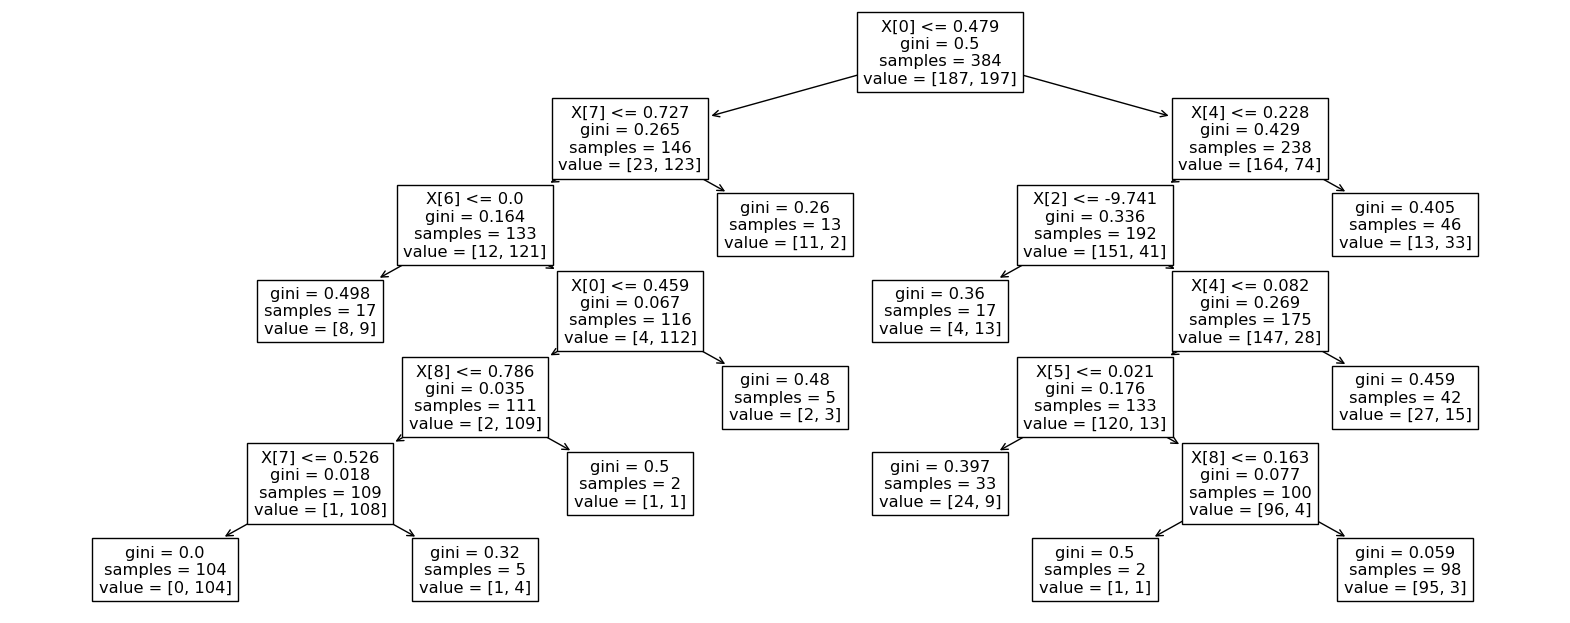

In [42]:
clt = tree.DecisionTreeClassifier()
clt.fit(x_train_tree, y_train)
y_pred = clt.predict(x_test_tree)

pierre_trainandtest = clt.predict(test_set_final)

print("The accuracy is: ", metrics.accuracy_score(y_test,y_pred))

#to_pierre = clt.predict(test_set_final)

#The below parameter is "sample size independent".
#Parameter testing: Minimum datapoints required to split a region/node.

acc_list_min_samples_split = []
n = 100 #Minimum sample size needed to split.
for i in range(2,n):
    clt.set_params(min_samples_split=i)
    clt = clt.fit(x_train_tree, y_train)
    y_pred = clt.predict(x_test_tree)
    acc_list_min_samples_split.append(metrics.accuracy_score(y_test,y_pred))
plt.plot(range(2,n),acc_list_min_samples_split)
"""

#The Below parameter gives different results for different sample sizes.
#Parameter testing: Maximum number of regions/leaves allowed.
acc_list_max_leaf_nodes = []
m = 5 #Min Max number of regions/leaves allowed.
n = 30 #Max Max number of regions/leaves allowed.
for i in range(m,n):
    clt.set_params(max_leaf_nodes=i)
    clt = clt.fit(x_train, y_train)
    y_pred = clt.predict(x_test)
    acc_list_max_leaf_nodes.append(metrics.accuracy_score(y_test,y_pred))
plt.plot(range(m,n),acc_list_max_leaf_nodes)
#print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))
#print(argmax(acc_list_max_leaf_nodes))
#Gets parameters.
"""

#print("The parameters are: ",clt.get_params())
#print("The number of leaves is: ",clt.get_n_leaves())


#Plots the tree.
tree.plot_tree(clt)

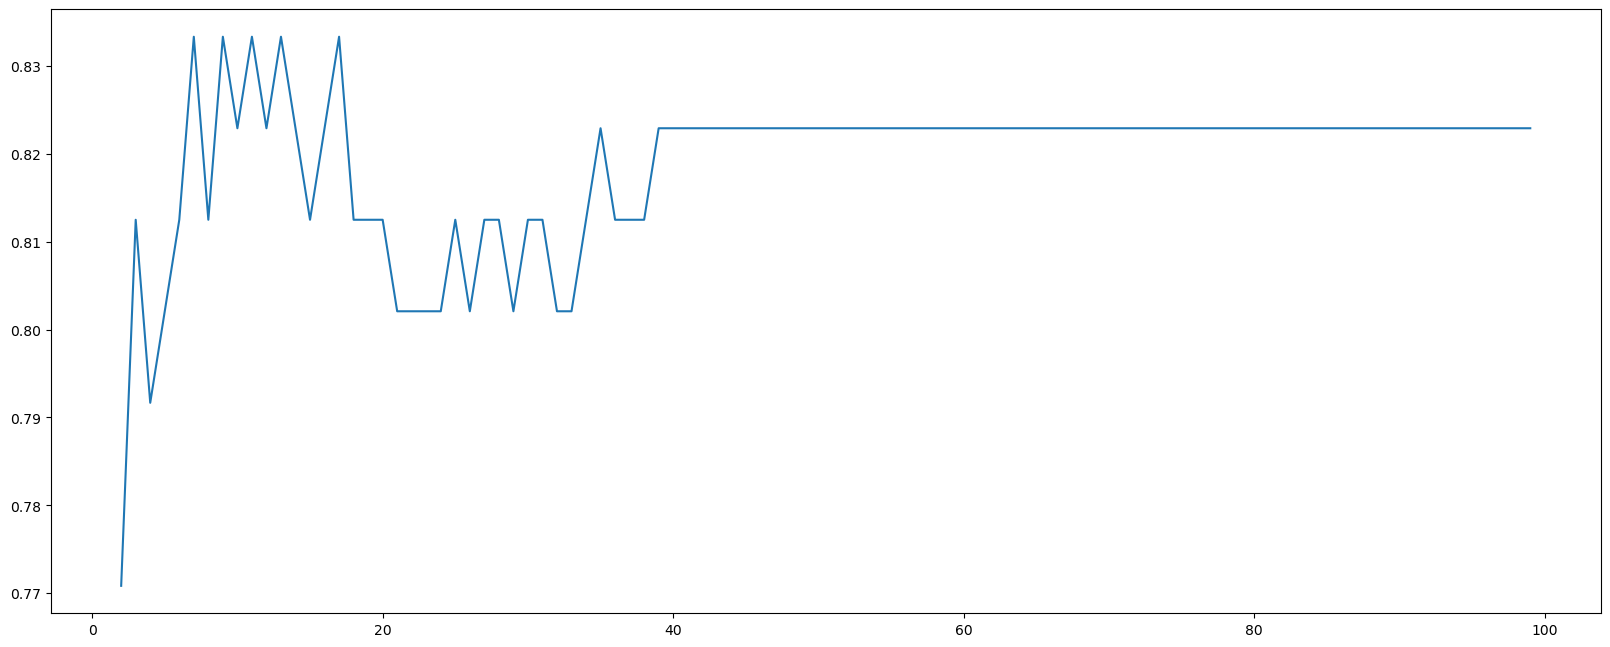

In [43]:
plt.plot(range(2,n),acc_list_min_samples_split)

[Text(723.3333333333333, 576.5454545454545, 'X[0] <= 0.514\ngini = 0.5\nsamples = 480\nvalue = [240, 240]'),
 Text(516.6666666666666, 521.6363636363636, 'X[7] <= 0.727\ngini = 0.326\nsamples = 205\nvalue = [42, 163]'),
 Text(413.3333333333333, 466.72727272727275, 'X[6] <= 0.0\ngini = 0.247\nsamples = 187\nvalue = [27, 160]'),
 Text(310.0, 411.8181818181818, 'gini = 0.497\nsamples = 28\nvalue = [13, 15]'),
 Text(516.6666666666666, 411.8181818181818, 'X[0] <= 0.459\ngini = 0.161\nsamples = 159\nvalue = [14, 145]'),
 Text(413.3333333333333, 356.90909090909093, 'X[7] <= 0.346\ngini = 0.081\nsamples = 142\nvalue = [6, 136]'),
 Text(310.0, 302.0, 'X[8] <= 0.786\ngini = 0.031\nsamples = 126\nvalue = [2, 124]'),
 Text(206.66666666666666, 247.09090909090912, 'X[6] <= 0.0\ngini = 0.016\nsamples = 124\nvalue = [1, 123]'),
 Text(103.33333333333333, 192.1818181818182, 'gini = 0.105\nsamples = 18\nvalue = [1, 17]'),
 Text(310.0, 192.1818181818182, 'gini = 0.0\nsamples = 106\nvalue = [0, 106]'),
 Tex

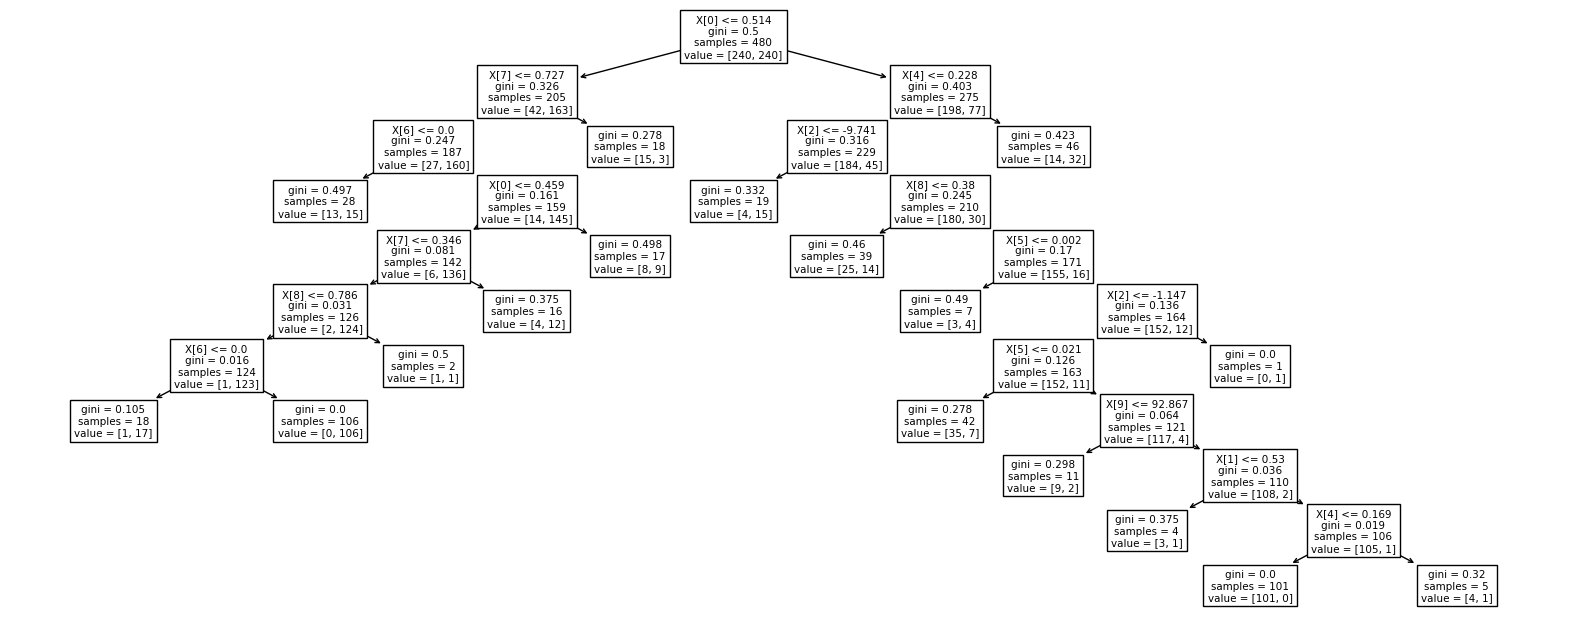

In [44]:
# FOR PIERRE

clt = tree.DecisionTreeClassifier()
clt.set_params(min_samples_split=50)
clt.fit(x_all_tree, y)

pierre_alldata = clt.predict(test_set_final)



"""
#The Below parameter gives different results for different sample sizes.
#Parameter testing: Maximum number of regions/leaves allowed.
acc_list_max_leaf_nodes = []
m = 5 #Min Max number of regions/leaves allowed.
n = 30 #Max Max number of regions/leaves allowed.
for i in range(m,n):
    clt.set_params(max_leaf_nodes=i)
    clt = clt.fit(x_train, y_train)
    y_pred = clt.predict(x_test)
    acc_list_max_leaf_nodes.append(metrics.accuracy_score(y_test,y_pred))
plt.plot(range(m,n),acc_list_max_leaf_nodes)
#print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))
#print(argmax(acc_list_max_leaf_nodes))
#Gets parameters.
"""

#print("The parameters are: ",clt.get_params())
#print("The number of leaves is: ",clt.get_n_leaves())


#Plots the tree.
tree.plot_tree(clt)

In [46]:

diff=0

for i in range(80):
    if pierre_trainandtest[i]!=pierre_alldata[i]:
        diff=diff+1
print(diff)

print(pierre_trainandtest)

19
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 0.]


The accuracy is:  0.7916666666666666


"\n#The Below parameter gives different results for different sample sizes.\n#Parameter testing: Maximum number of regions/leaves allowed.\nacc_list_max_leaf_nodes = []\nm = 5 #Min Max number of regions/leaves allowed.\nn = 30 #Max Max number of regions/leaves allowed.\nfor i in range(m,n):\n    clt.set_params(max_leaf_nodes=i)\n    clt = clt.fit(x_train, y_train)\n    y_pred = clt.predict(x_test)\n    acc_list_max_leaf_nodes.append(metrics.accuracy_score(y_test,y_pred))\nplt.plot(range(m,n),acc_list_max_leaf_nodes)\n#print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))\n#print(argmax(acc_list_max_leaf_nodes))\n#Gets parameters.\n"

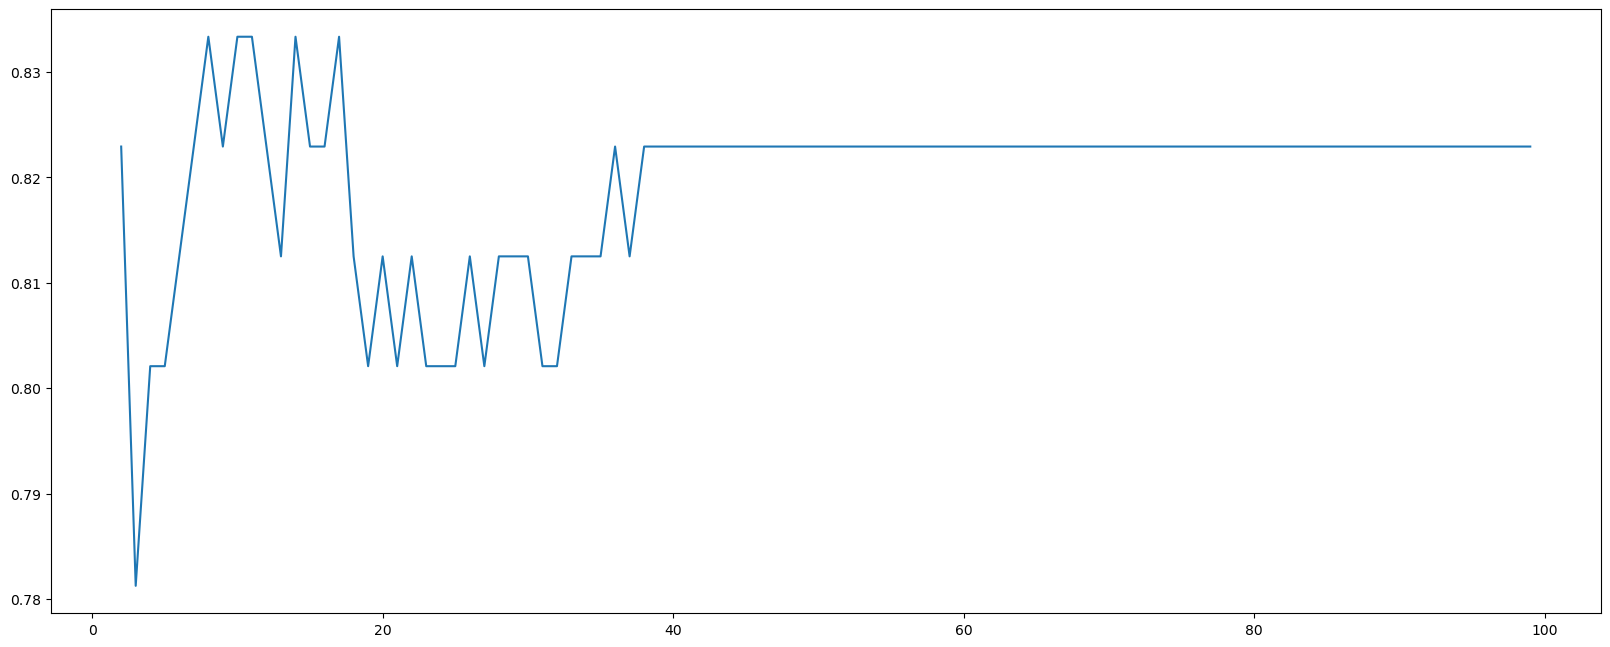

In [150]:

clt = tree.DecisionTreeClassifier()
clt.fit(x_train_cont, y_train)
y_pred = clt.predict(x_test_cont)
print("The accuracy is: ", metrics.accuracy_score(y_test,y_pred))



#The below parameter is "sample size independent".
#Parameter testing: Minimum datapoints required to split a region/node.
acc_list_min_samples_split = []
n = 100 #Minimum sample size needed to split.
for i in range(2,n):
    clt.set_params(min_samples_split=i)
    clt = clt.fit(x_train_cont, y_train)
    y_pred = clt.predict(x_test_cont)
    acc_list_min_samples_split.append(metrics.accuracy_score(y_test,y_pred))
plt.plot(range(2,n),acc_list_min_samples_split)


"""
#The Below parameter gives different results for different sample sizes.
#Parameter testing: Maximum number of regions/leaves allowed.
acc_list_max_leaf_nodes = []
m = 5 #Min Max number of regions/leaves allowed.
n = 30 #Max Max number of regions/leaves allowed.
for i in range(m,n):
    clt.set_params(max_leaf_nodes=i)
    clt = clt.fit(x_train, y_train)
    y_pred = clt.predict(x_test)
    acc_list_max_leaf_nodes.append(metrics.accuracy_score(y_test,y_pred))
plt.plot(range(m,n),acc_list_max_leaf_nodes)
#print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))
#print(argmax(acc_list_max_leaf_nodes))
#Gets parameters.
"""

#print("The parameters are: ",clt.get_params())
#print("The number of leaves is: ",clt.get_n_leaves())


#Plots the tree.
#tree.plot_tree(clt)

[Text(861.1111111111111, 543.6, 'X[0] <= 0.479\ngini = 0.5\nsamples = 360\nvalue = [175, 185]'),
 Text(516.6666666666667, 422.8, 'X[6] <= 0.78\ngini = 0.249\nsamples = 137\nvalue = [20, 117]'),
 Text(344.44444444444446, 302.0, 'X[5] <= 0.0\ngini = 0.159\nsamples = 126\nvalue = [11, 115]'),
 Text(172.22222222222223, 181.2, 'gini = 0.5\nsamples = 16\nvalue = [8, 8]'),
 Text(516.6666666666667, 181.2, 'X[7] <= 0.545\ngini = 0.053\nsamples = 110\nvalue = [3, 107]'),
 Text(344.44444444444446, 60.39999999999998, 'gini = 0.0\nsamples = 99\nvalue = [0, 99]'),
 Text(688.8888888888889, 60.39999999999998, 'gini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(688.8888888888889, 302.0, 'gini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(1205.5555555555557, 422.8, 'X[3] <= 0.228\ngini = 0.424\nsamples = 223\nvalue = [155, 68]'),
 Text(1033.3333333333335, 302.0, 'X[2] <= -9.741\ngini = 0.328\nsamples = 179\nvalue = [142, 37]'),
 Text(861.1111111111111, 181.2, 'gini = 0.36\nsamples = 17\nvalue = [4, 13

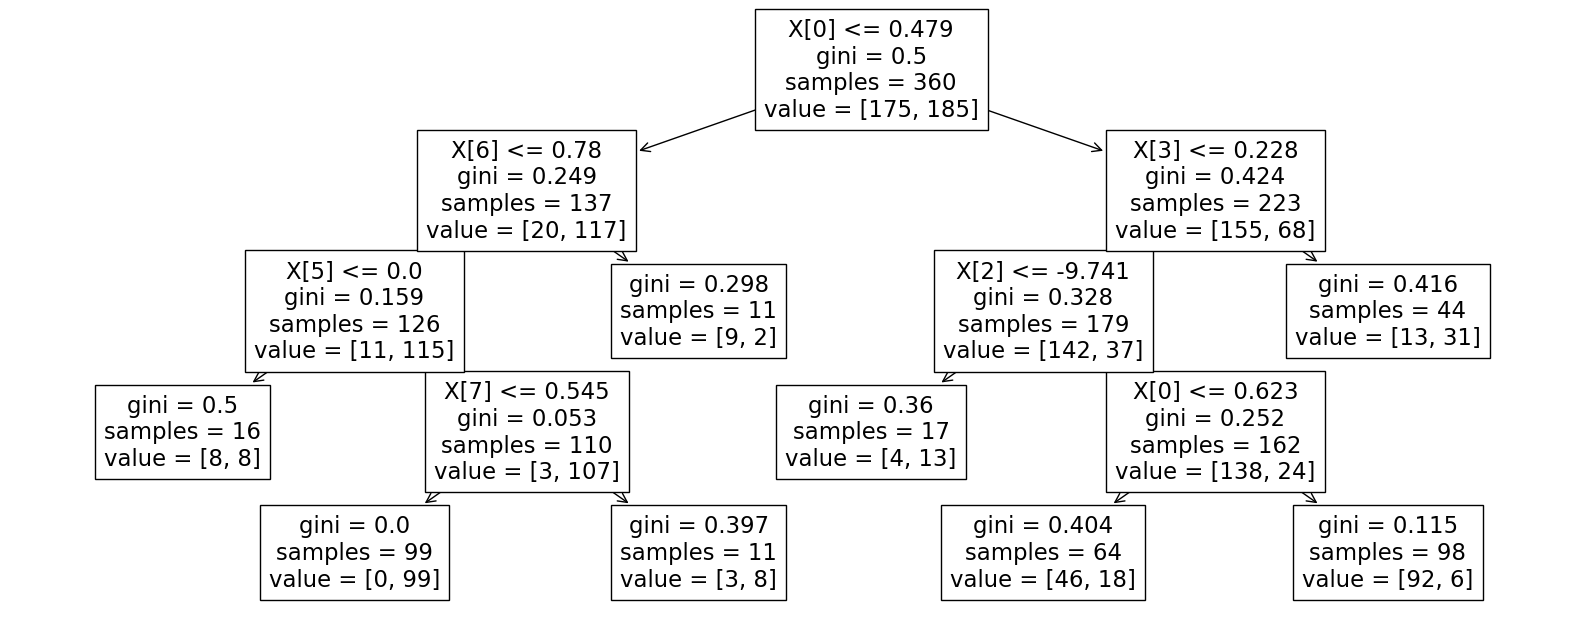

In [129]:
tree.plot_tree(clt)

## Neural networks (Nazaal)

In [56]:
# Load train and test input and output into Pytorch dataloaders
training_dataset_loader = torch.utils.data.DataLoader(dataset,
                                             batch_size=4, shuffle=True,
                                             num_workers=4)

In [57]:
# Design atleast 2 architectures
class Net(nn.Module):
    def __init__(self, n_features, layer_architecture, activation_fn):
        super().__init__()
        self.model = nn.Sequential()
        self.model.add_module("Hidden 0", nn.Linear(dim,layer_architecture[0]))
        for i in range(len(layer_architecture)-1):
            self.model.add_module("Hidden"+str(i+1),nn.Linear(dim,layer_architecture[i-1], dim,layer_architecture[i]))
            self.model.add_module("Batch norm "+str(i+1),nn.BatchNorm1d(layer_architecture[i]))
            self.model.add_module("Actvation "+str(i+1),activation_fn)
        self.model.add_module("Output",nn.Linear(layer_architecture[-1],1))
        
    def forward(self,x):
        return self.model(x)


# Look into hyperparameter optimization

In [58]:
class Dataset(torch.utils.data.Dataset):
    'Characterizes a dataset for PyTorch'
    def __init__(self, X, Y):
        'Initialization'
        self.X = X
        self.Y = Y

    def __len__(self):
        'Denotes the total number of samples'
        return len(self.X.shape[0])

    def __getitem__(self, index):
        'Generates one sample of data'
        # Load data and get label
        x = self.X[index,:]
        y = self.Y[index,:]
        return (x, y)

    
trainn = Dataset(x,y)
criterion = nn.MSELoss()
def neural_net_training(neural_net, loss, epochs):
    for i in range(epochs):
        break
        

## Gaussian processes (Nazaal)

In [155]:
var_x = np.std(x, axis=0)
var_y = np.std(y)
kernels = [var_y * RBF(var_x),
           var_y * RationalQuadratic(length_scale=1.0, alpha=0.1),
           ConstantKernel(0.1, (0.01, 10.0))
               * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)) ** 2),
           var_y * Matern(length_scale=var_x,
                        nu=1.0)]

gp_test_errors = []
for kernel in kernels:
    gpc = GaussianProcessClassifier(kernel=kernel)
    gpc.fit(x_train, y_train)
    gp_test_errors.append(gpc.score(x_test, y_test))
print("Test error are")
gp_test_errors


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpc.py:446: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Test error are


[0.78125, 0.6979166666666666, 0.8229166666666666, 0.8125]

In [127]:
var_x = np.std(x, axis=0)
var_y = np.std(y)
kernels = [var_y * RBF(length_scale=9*[var_x]),
           var_y * RationalQuadratic(length_scale=9*[var_x], alpha=0.1),
           ConstantKernel(0.1, (0.01, 10.0))
               * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)) ** 2),
           var_y * Matern(length_scale=var_x,
                        nu=1.0)]

gp_test_errors = []
for kernel in kernels:
    gpc = GaussianProcessClassifier(kernel=kernel)
    gpc.fit(x_train_cont, y_train)
    gp_test_errors.append(gpc.score(x_test_cont, y_test))
print("Test error are")
gp_test_errors


ValueError: length of x0 != length of bounds

In [ ]:
# Hyperparameter optimization
def HyperParameterOpt(model):
    # Trains the model over different hyper-parameter settings and finds the best one
    pass

In [ ]:
# Note: Use ensemble methods for final classifier